<a href="https://colab.research.google.com/github/ItsMeVenkatesh/Venkat/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler,LabelEncoder

**Importing the dataset**

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
le = LabelEncoder()


In [9]:
df['Gender'] = le.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [13]:
df.drop(['User ID'], axis = 1, inplace = True)

KeyError: ignored

In [14]:
sc = StandardScaler()


In [15]:
df.iloc[:,:3]  = sc.fit_transform(df.iloc[:,:3])
df

,Gender,Age,EstimatedSalary,Purchased
0,1.020204,-1.781797,-1.490046,0
1,1.020204,-0.253587,-1.460681,0
2,-0.980196,-1.113206,-0.785290,0
3,-0.980196,-1.017692,-0.374182,0
4,1.020204,-1.781797,0.183751,0
...,...,...,...,...
395,-0.980196,0.797057,-0.844019,1
396,1.020204,1.274623,-1.372587,1
397,-0.980196,1.179110,-1.460681,1
398,1.020204,-0.158074,-1.078938,0


In [16]:
X = df.drop(['Purchased'], axis=1)
X

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


In [17]:
Y = df['Purchased']
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [18]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=99)

In [19]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((280, 3), (120, 3), (280,), (120,))

In [20]:
dt =  DecisionTreeClassifier()

In [21]:
dt.fit(train_x, train_y)

DecisionTreeClassifier()

**Feature Scaling**

In [22]:
features = pd.DataFrame({'Features' : train_x.columns, 'Importance' : dt.feature_importances_})
features.sort_values('Importance', ascending=False)

,Features,Importance
1,Age,0.517947
2,EstimatedSalary,0.463196
0,Gender,0.018857


**Fitting Decision Tree Classification to the Training set**

In [23]:
y_pred = dt.predict(test_x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

**Predicting the Test set results**

In [24]:
results = pd.DataFrame({'Actual' : test_y, 'Predicted' : y_pred})
results

,Actual,Predicted
61,0,0
348,0,0
163,0,0
7,1,1
275,1,1
...,...,...
259,1,0
241,0,0
106,0,0
200,0,0


In [25]:
accuracy_score(test_y,y_pred)

0.8833333333333333

**Making the Confusion Matrix**

In [26]:
confusion_matrix(test_y,y_pred)

array([[76,  7],
       [ 7, 30]])

**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


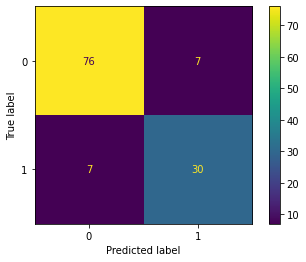

In [27]:
plot_confusion_matrix(dt, test_x, test_y)

**Visualising the Test set results**

[Text(0.5224358974358975, 0.9545454545454546, 'Age <= 0.654\ngini = 0.471\nsamples = 280\nvalue = [174, 106]\nclass = 0'),
 Text(0.33974358974358976, 0.8636363636363636, 'EstimatedSalary <= 0.61\ngini = 0.275\nsamples = 194\nvalue = [162, 32]\nclass = 0'),
 Text(0.16666666666666666, 0.7727272727272727, 'Age <= -0.11\ngini = 0.071\nsamples = 162\nvalue = [156, 6]\nclass = 0'),
 Text(0.14102564102564102, 0.6818181818181818, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]\nclass = 0'),
 Text(0.19230769230769232, 0.6818181818181818, 'EstimatedSalary <= 0.404\ngini = 0.211\nsamples = 50\nvalue = [44, 6]\nclass = 0'),
 Text(0.16666666666666666, 0.5909090909090909, 'EstimatedSalary <= 0.14\ngini = 0.153\nsamples = 48\nvalue = [44, 4]\nclass = 0'),
 Text(0.07692307692307693, 0.5, 'Age <= -0.015\ngini = 0.056\nsamples = 35\nvalue = [34, 1]\nclass = 0'),
 Text(0.05128205128205128, 0.4090909090909091, 'EstimatedSalary <= -0.183\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.0256410

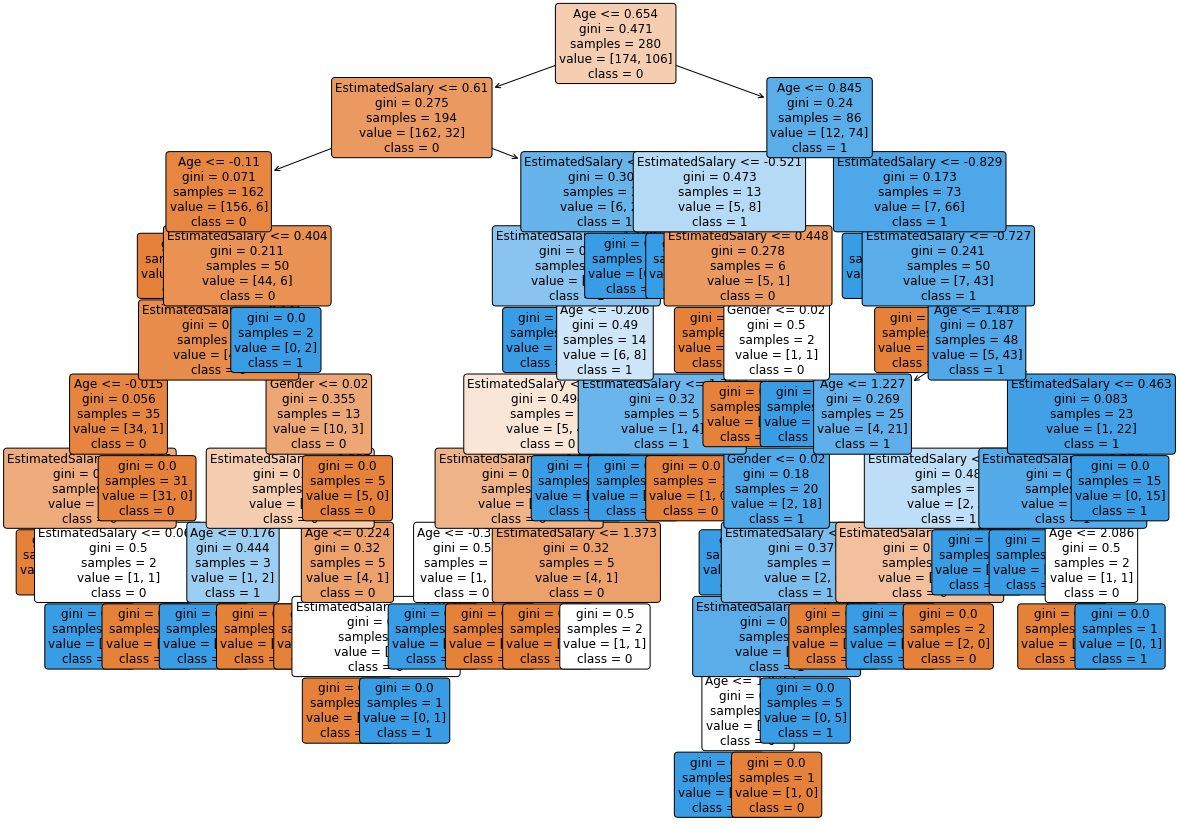

In [29]:
plt.figure(figsize=(20,15))

tree.plot_tree(dt,class_names=['0','1'],feature_names=train_x.columns, filled=True,rounded=True,fontsize=12)